

Analyse de l’accessibilité piétonne aux services à Shanghai

Étude des buffers 5, 10 et 15 minutes – "Ville du Quart d’Heure"

Thalia Ghali
Mai 2025



'On a trouvé une vitesse de marche de (20-39 ans) : environ 1,31 m/s. (60 ans et plus) : environ 1,0 m/s.'

In [4]:
# import data science libraries



# import data science library with added geographic functions
import geopandas as gpd

import pandas as pd

import seaborn as sns

# useful to calculate the Ordinary Least Square linear regression

import statsmodels.api as sm

# useful to get fast distance calculation,
# see https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.BallTree.html
from sklearn.neighbors import BallTree

# useful to access functions like median, mean or std
from scipy import stats

# useful to get map background but hard to install...
# If not available REMOVE this
import contextily as cx

sns.set_style("white")

In [5]:
village_file = 'sh-villages.geojson'
village=gpd.read_file('sh-villages.geojson')

In [6]:
village.info()
village.describe()
village.head()


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5614 entries, 0 to 5613
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   ad_code   5614 non-null   object  
 1   name      5614 non-null   object  
 2   multi     5614 non-null   float64 
 3   ismulti   5614 non-null   object  
 4   geometry  5614 non-null   geometry
dtypes: float64(1), geometry(1), object(3)
memory usage: 219.4+ KB


,ad_code,name,multi,ismulti,geometry
0,310104017001,习勤社区,1.0,N,"POLYGON ((121.42336 31.16744, 121.42065 31.167..."
1,310112006036,古龙四村社区,1.0,N,"POLYGON ((121.40327 31.15131, 121.39904 31.149..."
2,310112101051,香树丽舍社区,1.0,N,"POLYGON ((121.37217 31.12649, 121.36911 31.125..."
3,310113101011,罗新社区,1.0,N,"POLYGON ((121.34649 31.42434, 121.34347 31.423..."
4,310113101012,金星第二社区,1.0,N,"POLYGON ((121.35246 31.42298, 121.3476 31.4215..."


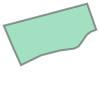

In [7]:
village.iloc[789,:].geometry

#iloc est pour selectionner un numéro de lignes, les ':' pour toutes les colonnes et il a selectionné la colonne geometry




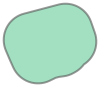

In [8]:
village.iloc[789,:].geometry.buffer(0.005)


In [9]:
#ici la colonne geometry est en degres on l'a met en m

village.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [25]:
# Toujours commencer par reprojeter en CRS métrique !
village = village.to_crs(4576)


In [26]:
WALK_SPEED = 1.31  # m/s

village['buffer_5'] = village.geometry.buffer(5 * 60 * WALK_SPEED)
village['buffer_10'] = village.geometry.buffer(10 * 60 * WALK_SPEED)
village['buffer_15'] = village.geometry.buffer(15 * 60 * WALK_SPEED)


In [27]:
village

,ad_code,name,multi,ismulti,geometry,buffer__10m,buffer_15m,buffer_10m,buffer_5,buffer_10,buffer_15
0,310104017001,习勤社区,1.0,N,"POLYGON ((21349676.387 3450670.02, 21349417.60...","POLYGON ((13517571.851 3654544.53, 13517571.05...","POLYGON ((13517964.537 3654560.242, 13517963.3...","POLYGON ((13517571.851 3654544.53, 13517571.05...","POLYGON ((21350069.255 3450680.214, 21350068.3...","POLYGON ((21350462.123 3450690.409, 21350460.2...","POLYGON ((21350854.99 3450700.603, 21350852.13..."
1,310112006036,古龙四村社区,1.0,N,"POLYGON ((21347735.349 3448909.123, 21347329.2...","POLYGON ((13515289.809 3652682.379, 13515312.3...","POLYGON ((13515659.414 3652815.95, 13515693.28...","POLYGON ((13515289.809 3652682.379, 13515312.3...","POLYGON ((21348106.64 3449037.934, 21348117.47...","POLYGON ((21348477.93 3449166.745, 21348499.60...","POLYGON ((21348849.221 3449295.556, 21348881.7..."
2,310112101051,香树丽舍社区,1.0,N,"POLYGON ((21344728.881 3446199.754, 21344435.6...","POLYGON ((13509945.764 3649814.875, 13509962.4...","POLYGON ((13509595.061 3649994.747, 13509605.5...","POLYGON ((13509945.764 3649814.875, 13509962.4...","POLYGON ((21344007.098 3446618.711, 21344010.4...","POLYGON ((21343659.436 3446807.364, 21343670.9...","POLYGON ((21343308.941 3446986.476, 21343316.5..."
3,310113101011,罗新社区,1.0,N,"POLYGON ((21342773.841 3479266.723, 21342485.0...","POLYGON ((13508506.329 3687245.171, 13508173.2...","POLYGON ((13508644.655 3686877.315, 13508313.1...","POLYGON ((13508506.329 3687245.171, 13508173.2...","POLYGON ((21342906.021 3478896.615, 21342618.7...","POLYGON ((21343038.201 3478526.507, 21342752.4...","POLYGON ((21343170.381 3478156.398, 21342886.2..."
4,310113101012,金星第二社区,1.0,N,"POLYGON ((21343339.416 3479107.297, 21342874.9...","POLYGON ((13509635.04 3688066.457, 13509657.33...","POLYGON ((13510005.374 3688197.994, 13510038.8...","POLYGON ((13509635.04 3688066.457, 13509657.33...","POLYGON ((21343711.486 3479233.84, 21343722.15...","POLYGON ((21344083.556 3479360.382, 21344104.8...","POLYGON ((21344455.625 3479486.925, 21344487.6..."
...,...,...,...,...,...,...,...,...,...,...,...
5609,310130123215,北兴村,2.0,Y,"MULTIPOLYGON (((21374569.273 3476069.823, 2137...","POLYGON ((13543718.189 3684893.407, 13542984.1...","POLYGON ((13543548.675 3687707.365, 13543551.0...","POLYGON ((13543718.189 3684893.407, 13542984.1...","POLYGON ((21373176.171 3477933.103, 21373206.4...","POLYGON ((21374229.996 3475315.287, 21374034.2...","POLYGON ((21372872.683 3478797.657, 21372905.0..."
5610,310130123220,先丰村,3.0,Y,"MULTIPOLYGON (((21384238.085 3471947.222, 2138...","MULTIPOLYGON (((13553483.788 3681990.566, 1355...","MULTIPOLYGON (((13553092.849 3681953.685, 1355...","MULTIPOLYGON (((13553483.788 3681990.566, 1355...","MULTIPOLYGON (((21381651.913 3473685.697, 2138...","MULTIPOLYGON (((21381260.611 3473652.878, 2138...","MULTIPOLYGON (((21380869.31 3473620.059, 21380..."
5611,310130123224,创建村,2.0,Y,"MULTIPOLYGON (((21369037.199 3479156.427, 2136...","POLYGON ((13534660.735 3689551.464, 13534668.1...","POLYGON ((13534283.474 3689665.113, 13534287.8...","POLYGON ((13534660.735 3689551.464, 13534668.1...","POLYGON ((21365710.557 3480375.312, 21365725.5...","POLYGON ((21365260.841 3480322.791, 21365266.5...","POLYGON ((21364885.21 3480441.751, 21364887.72..."
5612,310130409598,前卫农场虚拟生活区,2.0,Y,"MULTIPOLYGON (((21382701.032 3470797.988, 2138...","MULTIPOLYGON (((13551139.17 3681316.546, 13551...","POLYGON ((13545910.121 3684761.828, 13545795.6...","MULTIPOLYGON (((13551139.17 3681316.546, 13551...","MULTIPOLYGON (((21379379.395 3472735.168, 2137...","POLYGON ((21375155.567 3476136.52, 21375025.41...","POLYGON ((21374685.209 3476197.87, 21374630.29..."


<Axes: >

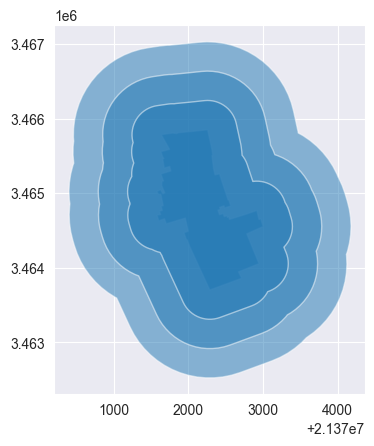

In [28]:
ax = village.sample(random_state=100).plot(alpha=0.5)
village.sample(random_state=100).set_geometry('buffer_15').plot(ax=ax, alpha=0.5)
village.sample(random_state=100).set_geometry('buffer_10').plot(ax=ax, alpha=0.5)
village.sample(random_state=100).set_geometry('buffer_5').plot(ax=ax, alpha=0.5)


In [29]:
# 1. Charger les POI (points of interest)
poi = gpd.read_file("上海市-POI.shp")

In [32]:
poi_5min = poi[
    (poi.typecode == '110101') |  # park 公园
    (poi.typecode == '080501') |  # children's park 儿童乐园
    (poi.typecode == '141204') |  # kindergarten 幼儿园
    (poi.typecode == '060200') |  # convenience store 便利店
    (poi.typecode == '060705') |  # fresh market 菜市场
    (poi.typecode == '070000') |  # elderly care 养老院
    (poi.typecode == '080101') |  # sports venue 体育馆
    (poi.typecode == '060400') |  # supermarket 超市
    (poi.typecode == '141202') |  # middle school 中学
    (poi.typecode == '141203') |  # primary school 小学
    (poi.typecode == '140800') |  # cultural venue 文化宫
    (poi.typecode == '090000') |  # medical care 医疗保健服务场所
    (poi.typecode == '090300')    # clinic 诊所
]

On filtre les POI (points d’intérêt) pour ne garder que ceux jugés essentiels à moins de 5 minutes à pied: parcs, écoles, supérettes, lieux de soins, équipements sportifs, etc.


In [33]:
poi_5min.info()
poi_5min.head()


<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 68472 entries, 334 to 1618424
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   id          68472 non-null  object  
 1   pname       68472 non-null  object  
 2   pcode       68472 non-null  int64   
 3   cityname    68472 non-null  object  
 4   citycode    68472 non-null  int64   
 5   adname      68472 non-null  object  
 6   adcode      68472 non-null  int64   
 7   name        68472 non-null  object  
 8   address     68472 non-null  object  
 9   location    68472 non-null  object  
 10  tel         68472 non-null  object  
 11  business_a  68472 non-null  object  
 12  bigType     68472 non-null  object  
 13  midType     68472 non-null  object  
 14  smallType   68472 non-null  object  
 15  typecode    68472 non-null  object  
 16  timestamp   68472 non-null  object  
 17  gcjLng      68472 non-null  float64 
 18  gcjLat      68472 non-null  float64 
 1

,id,pname,pcode,cityname,citycode,adname,adcode,name,address,location,...,bigType,midType,smallType,typecode,timestamp,gcjLng,gcjLat,wgs84Lng,wgs84Lat,geometry
334,9c62a71c-de2a-3d3c-8502-47b82cf7b9c1,上海市,310000,上海市,21,浦东新区,310115,ETC办理华裕吉鑫上牌点,周祝公路1222号,"121.642834,31.106829",...,生活服务,生活服务场所,生活服务场所,070000,2024-08-24 13:33:00,121.642834,31.106829,121.638607,31.109055,POINT (121.63861 31.10906)
336,924eb1ba-cf0e-381c-81a6-fdbdd949562d,上海市,310000,上海市,21,浦东新区,310115,废品回收,申江南路辅路与民治路交叉口东南100米,"121.639085,31.114438",...,生活服务,生活服务场所,生活服务场所,070000,2024-07-16 10:41:31,121.639085,31.114438,121.634864,31.116666,POINT (121.63486 31.11667)
419,a8cf014f-e8d5-3608-b4d1-b3abf4f6a9ea,上海市,310000,上海市,21,徐汇区,310104,工会驿站-工会驿站(爱心驿站中国石化田林加油站),田林街道钦州路637号,"121.429474,31.174856",...,生活服务,生活服务场所,生活服务场所,070000,2024-04-08 16:42:05,121.429474,31.174856,121.424847,31.176735,POINT (121.42485 31.17674)
425,892317b4-c0d7-332f-8c81-e27f10ce8374,上海市,310000,上海市,21,徐汇区,310104,易居房友(钦州路总店),钦州路788号,"121.428280,31.176236",...,生活服务,生活服务场所,生活服务场所,070000,2024-07-14 19:06:07,121.428280,31.176236,121.423651,31.178112,POINT (121.42365 31.17811)
432,92eada42-30ec-3e27-ae4b-667beb446c30,上海市,310000,上海市,21,徐汇区,310104,天配工作室,爱建园39号楼701,"121.431472,31.176812",...,生活服务,生活服务场所,生活服务场所,070000,2024-08-24 02:56:11,121.431472,31.176812,121.426848,31.178692,POINT (121.42685 31.17869)


On vérifie la taille et la composition de notre sous-ensemble de POI

In [35]:
villages_5min = village.set_geometry('buffer_5').sjoin(poi_5min.to_crs(village.crs))


On compte combien de POI de ce type sont accessibles dans le buffer "5 minutes" autour de chaque village.
Cela nous permet d’évaluer l’offre réelle à proximité immédiate de chaque quartier.

4️⃣ Comptage par quartier et affectation du score




In [36]:
count_5min = villages_5min.groupby(villages_5min.index).size()
village['score_5min'] = count_5min
village['score_5min'] = village['score_5min'].fillna(0)


 On affecte à chaque quartier un score égal au nombre de services accessibles en 5 minutes à pied.
Les quartiers sans POI dans ce périmètre reçoivent un score de 0.


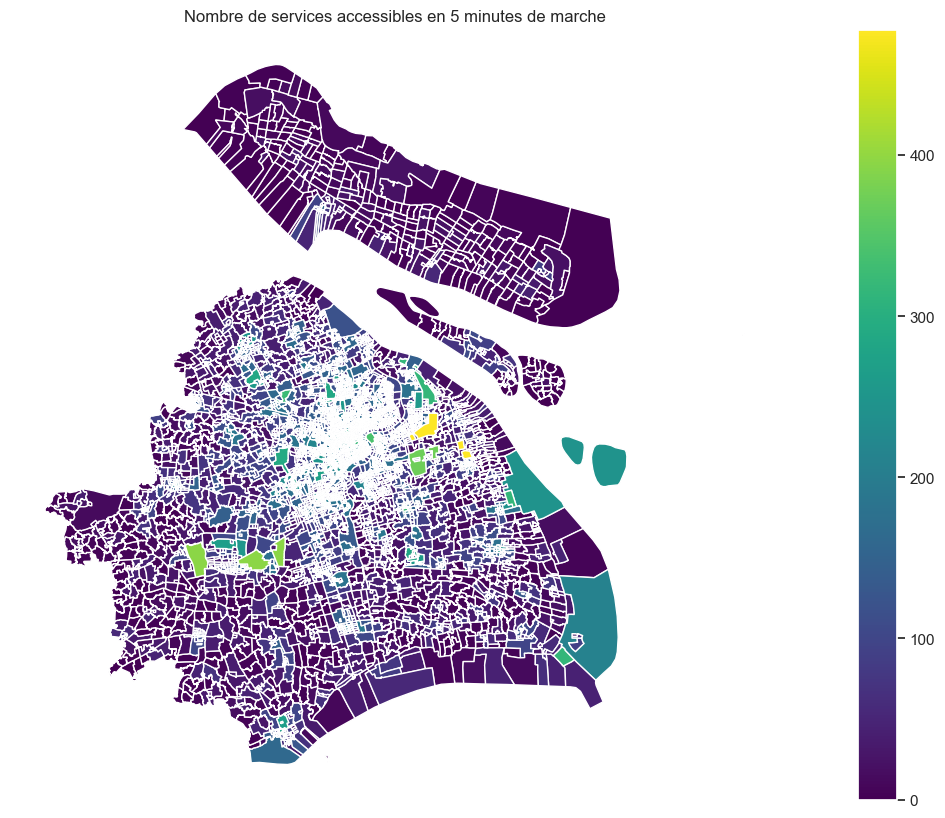

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

ax = village.plot(column='score_5min', cmap='viridis', legend=True, figsize=(20,10))
plt.title("Nombre de services accessibles en 5 minutes de marche")
plt.axis('off')
plt.show()


On visualise la distribution spatiale des quartiers les plus et les moins dotés en services accessibles à pied en moins de 5 minutes.

Faisons maintenant pareil avec 10 minutes et 15 minutes.

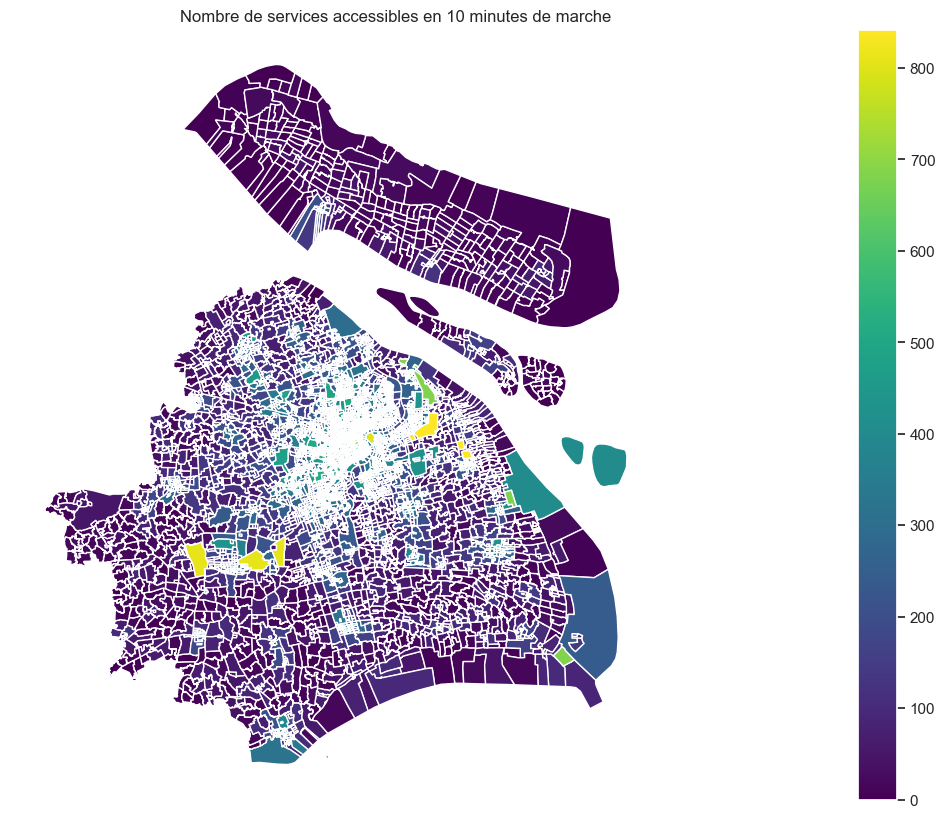

In [38]:

# Spatial join (tu peux garder la même sélection de POI que pour 5min)
villages_10min = village.set_geometry('buffer_10').sjoin(poi_5min.to_crs(village.crs))
count_10min = villages_10min.groupby(villages_10min.index).size()
village['score_10min'] = count_10min
village['score_10min'] = village['score_10min'].fillna(0)

# Carte 10 minutes
ax = village.plot(column='score_10min', cmap='viridis', legend=True, figsize=(20,10))
plt.title("Nombre de services accessibles en 10 minutes de marche")
plt.axis('off')
plt.show()


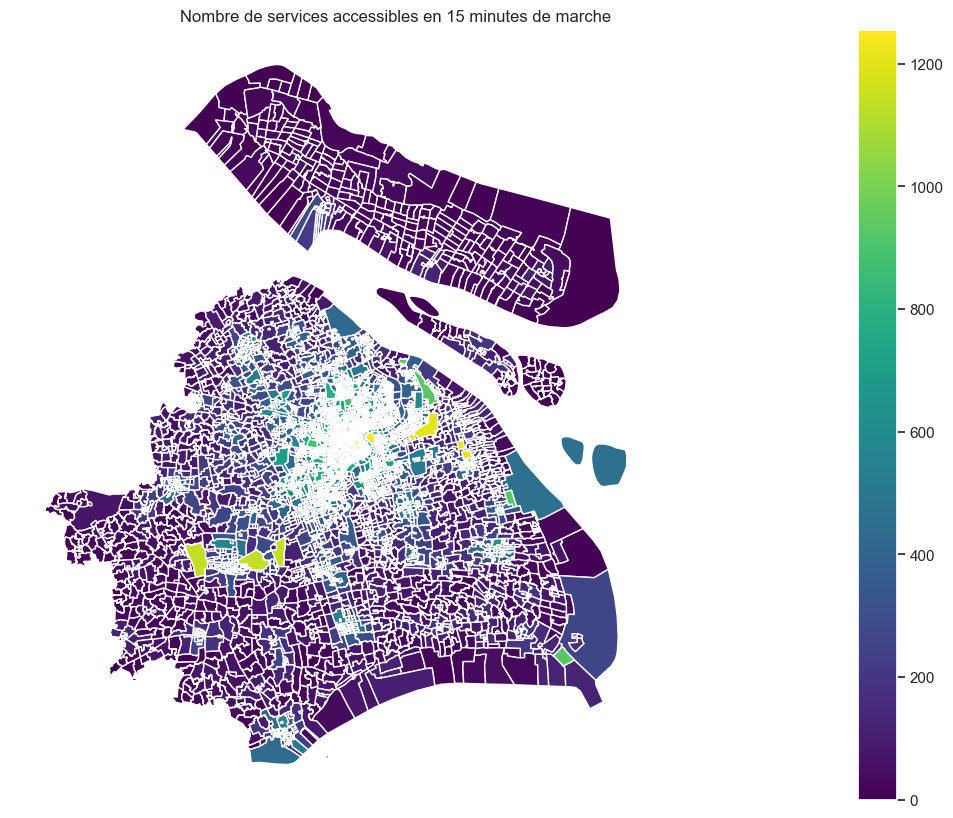

In [39]:


# Spatial join (toujours possible d’élargir la liste des POI, mais tu peux garder la même ici pour la démo)
villages_15min = village.set_geometry('buffer_15').sjoin(poi_5min.to_crs(village.crs))
count_15min = villages_15min.groupby(villages_15min.index).size()
village['score_15min'] = count_15min
village['score_15min'] = village['score_15min'].fillna(0)

# Carte 15 minutes
ax = village.plot(column='score_15min', cmap='viridis', legend=True, figsize=(20,10))
plt.title("Nombre de services accessibles en 15 minutes de marche")
plt.axis('off')
plt.show()

Ces trois cartes successives révèlent comment l’accessibilité piétonne évolue en fonction du temps de marche autour de chaque quartier. Plus le périmètre s’élargit, plus l’accès aux services s’améliore, mais les inégalités spatiales ne disparaissent pas complètement. Ce diagnostic est essentiel pour cibler les quartiers à renforcer et avancer vers une ville plus inclusive et résiliente.


Pour aller plus loin, on crée un score global d’accessibilité piétonne pour chaque quartier. Ce score agrège les accessibilités à 5, 10 et 15 minutes (après standardisation) en une seule valeur. Plus le score est élevé, plus le quartier est bien desservi en services de proximité, tous temps de marche confondus. Ce score offre un diagnostic synthétique, utile pour comparer rapidement les situations des différents quartiers et orienter les politiques d’aménagement urbain.

In [40]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
village['score_5min_scaled'] = scaler.fit_transform(village[['score_5min']])
village['score_10min_scaled'] = scaler.fit_transform(village[['score_10min']])
village['score_15min_scaled'] = scaler.fit_transform(village[['score_15min']])


In [41]:
village['score_global'] = (
    village['score_5min_scaled'] +
    village['score_10min_scaled'] +
    village['score_15min_scaled']
)


Le score global est la somme des trois scores standardisés. Il reflète la performance globale de chaque quartier en termes d’accessibilité piétonne.
3️⃣ Visualiser le score global sur une carte



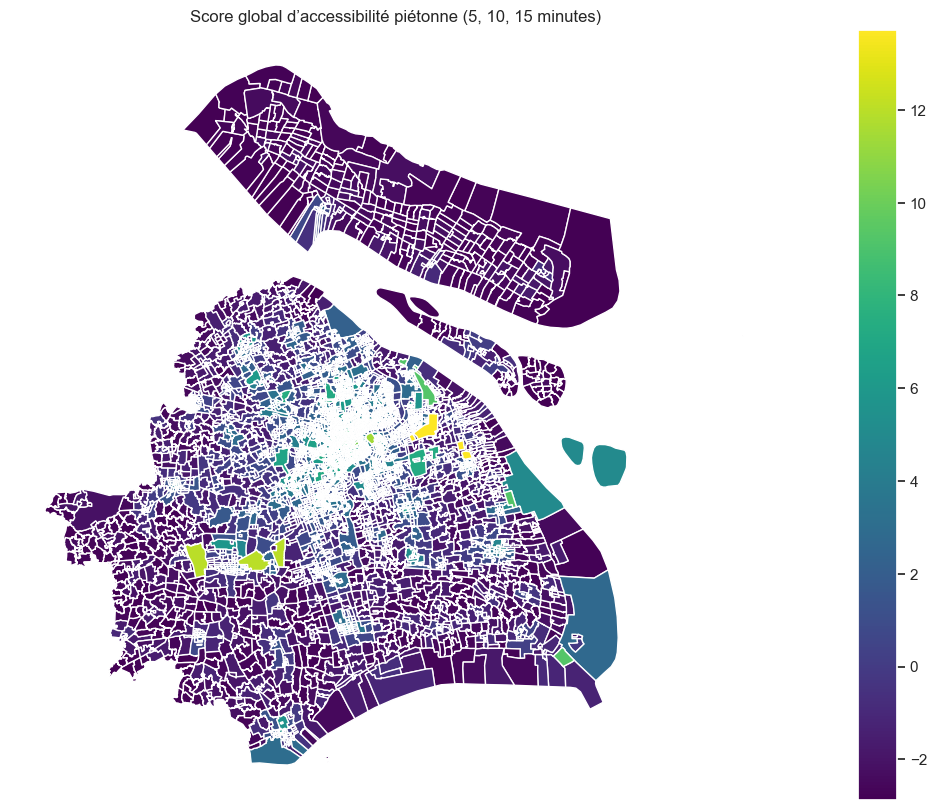

In [42]:
import matplotlib.pyplot as plt

ax = village.plot(column='score_global', cmap='viridis', legend=True, figsize=(20,10))
plt.title("Score global d’accessibilité piétonne (5, 10, 15 minutes)")
plt.axis('off')
plt.show()


Grâce à ce score global, on peut comparer simplement les quartiers entre eux, identifier les zones cumulant un bon accès aux services, et cibler les secteurs à améliorer pour tendre vers une ville du quart d’heure équitable.

Conclusion
Le score global d’accessibilité piétonne, obtenu en additionnant les scores standardisés à 5, 10 et 15 minutes, permet de comparer rapidement l’offre de services de chaque quartier à Shanghai. Cependant, on observe que ce score global ressemble visuellement à la carte des services accessibles en 15 minutes.
Cette ressemblance s’explique par le fait que, dans la plupart des quartiers, peu de services sont accessibles en 5 ou 10 minutes, tandis que l’essentiel des points d’intérêt deviennent accessibles à 15 minutes de marche. Ainsi, le score global est principalement influencé par l’accessibilité à 15 minutes, ce qui limite sa capacité à distinguer les quartiers véritablement favorisés en accessibilité immédiate.
Ce constat invite à nuancer l’interprétation du score global :
Il reste utile pour un diagnostic synthétique et une première comparaison entre quartiers.
Mais il masque l’enjeu fondamental de la ville du quart d’heure, à savoir la proximité réelle aux services du quotidien.
Pour aller plus loin, il serait pertinent de :
Proposer un score global pondéré, qui donne davantage d’importance à l’accessibilité à 5 et 10 minutes.
Compléter l’analyse par une lecture séparée de chaque carte (5, 10, 15 min), afin d’identifier les quartiers qui combinent véritablement une vie locale à échelle piétonne.
En résumé :
La démarche met en lumière la valeur d’une accessibilité immédiate, mais montre aussi la difficulté de la synthétiser en un seul indicateur. Cette limite est en soi un résultat intéressant pour la réflexion urbaine et l’aide à la décision.